In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [4]:
df.shape

(32724, 16)

In [5]:
df.describe()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,3.272400e+04,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,1.894990e+05,10.079941,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,1.053437e+05,2.568684,7480.459910,401.872849,12.454379
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,1.779005e+05,10.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,2.370062e+05,12.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

ID                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
net-income        object
dtype: object

In [7]:
# There are three features which has null values and can be replaced

df.isnull().sum()

ID                   0
age                  0
workclass         1895
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

In [8]:
# Making a new column 'income' and where the value is >50K assigning it as 1 else 0

df["income"] = 0
df["income"] = np.where(df["net-income"] == ">50K" , 1,0)

### Handling the missing values

In [9]:
df["workclass"].fillna("Without-pay" , inplace = True)

In [10]:
df["occupation"].fillna("Handlers-cleaners" , inplace = True)

In [11]:
df["native-country"].fillna("Hong" , inplace = True)

In [12]:
df.isnull().sum()

ID                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
net-income        0
income            0
dtype: int64

In [13]:
# There are two class thus this is a binary classificaation problem

df["net-income"].value_counts()

<=50K    24928
>50K      7796
Name: net-income, dtype: int64

In [14]:
corrmat = df.drop(["ID",'income'] , axis = 1).corr()
corrmat

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076764,0.036327,0.079704,0.048540,0.073012
fnlwgt,-0.076764,1.000000,-0.040412,-0.000839,-0.000021,-0.013981
education-num,0.036327,-0.040412,1.000000,0.128545,0.076494,0.145734
capital-gain,0.079704,-0.000839,0.128545,1.000000,-0.031456,0.080996
capital-loss,0.048540,-0.000021,0.076494,-0.031456,1.000000,0.054916
hours-per-week,0.073012,-0.013981,0.145734,0.080996,0.054916,1.000000


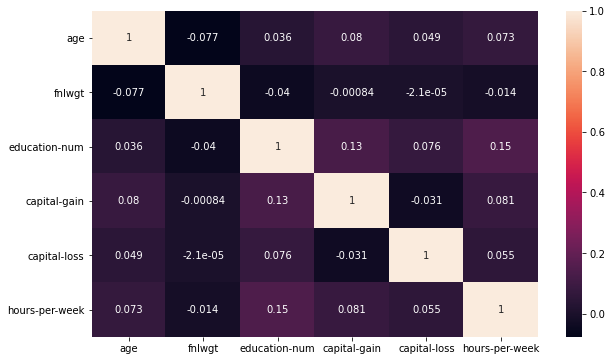

In [15]:
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat , data = df , annot = True)
plt.show()

### Bivaraite Analysis

In [16]:
num_col = [x for x in df.columns if df[x].dtype != "object" and x != "ID"]
cat_col = [x for x in df.columns if df[x].dtype == 'object']

### Observing the Numerical Categories with the target column

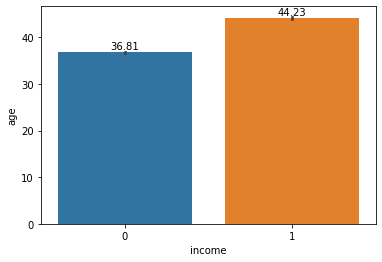

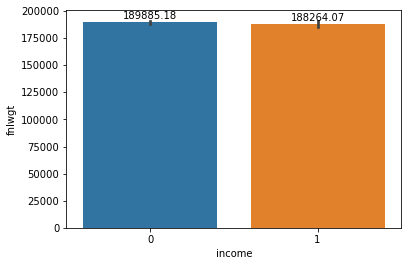

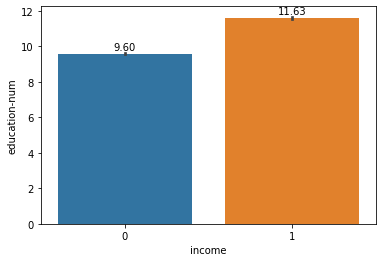

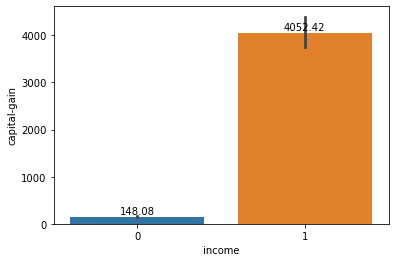

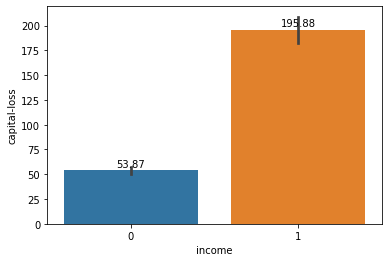

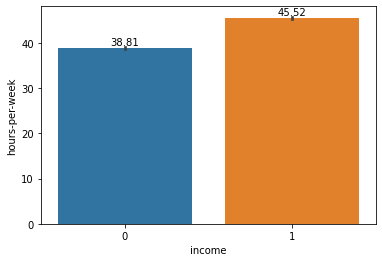

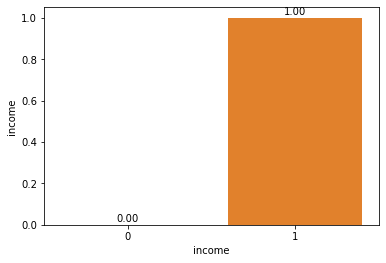

In [17]:
for col in num_col:
    plots = sns.barplot(x = "income" , y = col , data = df)
    for bar in plots.patches:
         plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    plt.show()

- Observation of the person having income '>50K' are as follows
1. Average 'age' of 44
2. Average education-num is 11 i.e., they have education more than 'Some-College' like 'Bachelors','Masters','Assoc-voc','Assoc-acdm','Prof-school','Doctorate'
3. Average capital gain is 4052.42
4. Avearage capital loss is 195.88
5. Average hours-per-week given is 45+

### Observing the Categorical feature with the target column

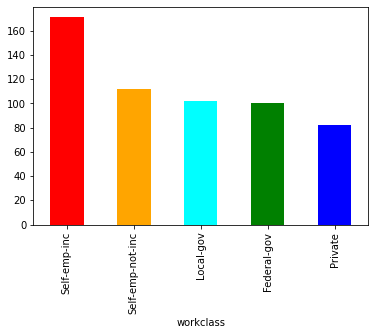

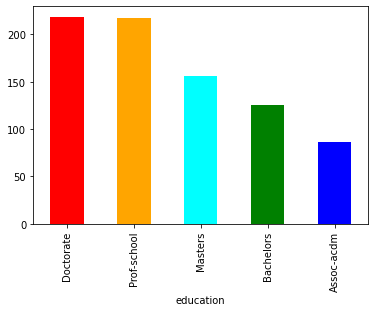

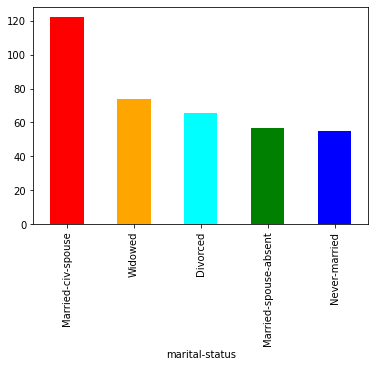

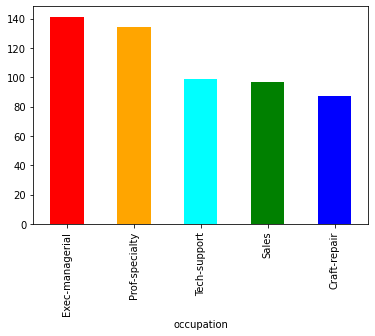

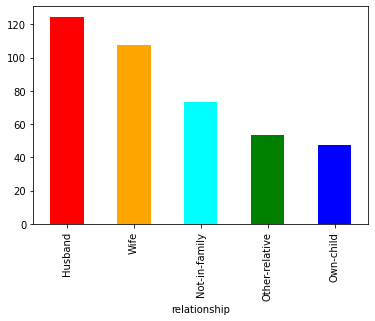

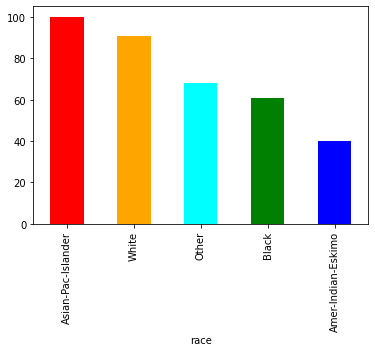

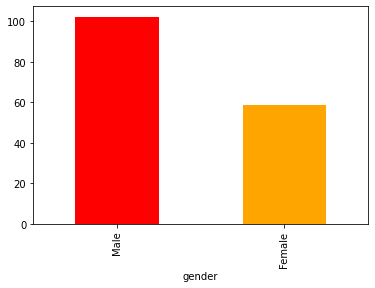

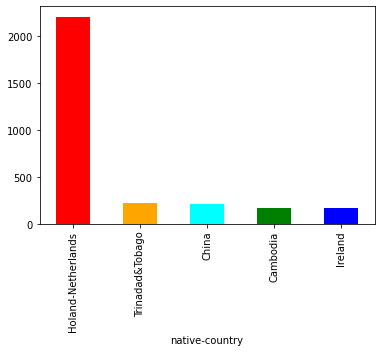

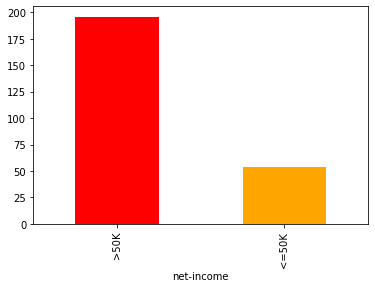

In [18]:
for col in cat_col:
    df.groupby(col)['capital-loss'].mean().sort_values(ascending = False).head().plot.bar(
    color = ["Red" , "Orange" , "Cyan" , "Green" , "Blue"])
    plt.show()

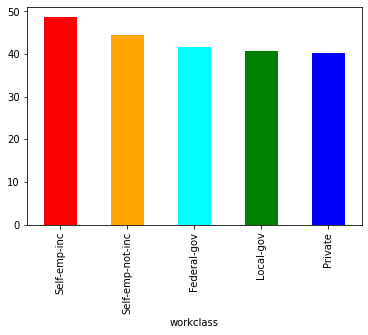

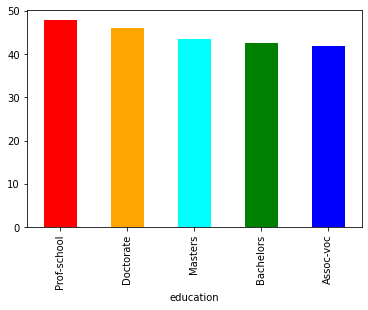

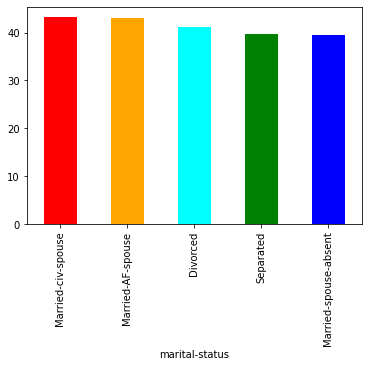

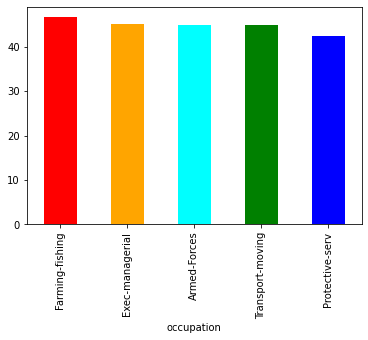

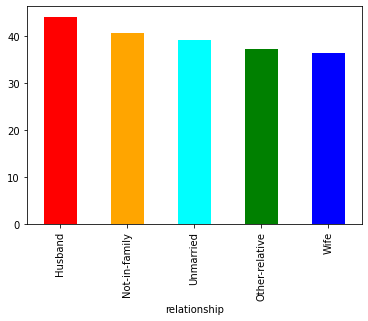

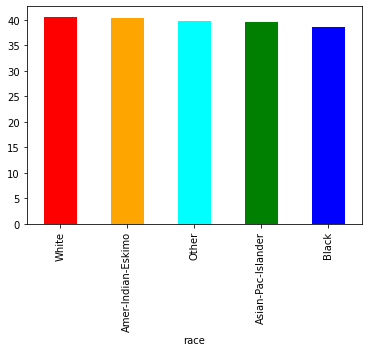

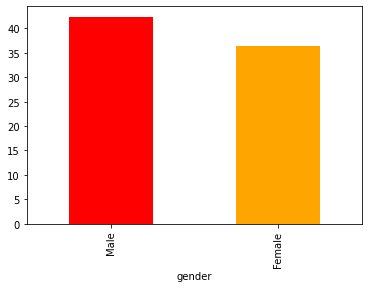

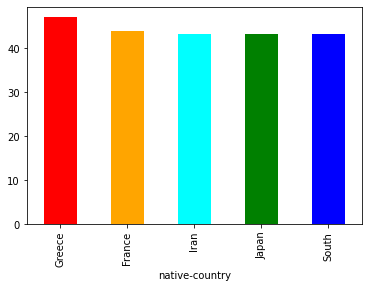

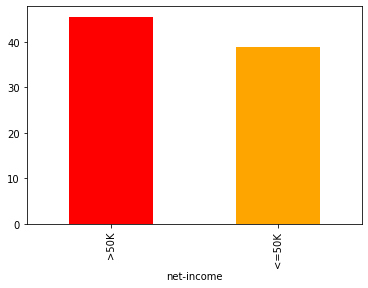

In [19]:
for col in cat_col:
    df.groupby(col)['hours-per-week'].mean().sort_values(ascending = False).head().plot.bar(
    color = ["Red" , "Orange" , "Cyan" , "Green" , "Blue"])
    plt.show()

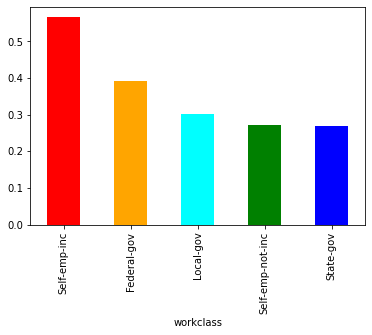

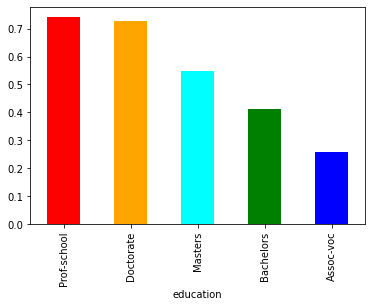

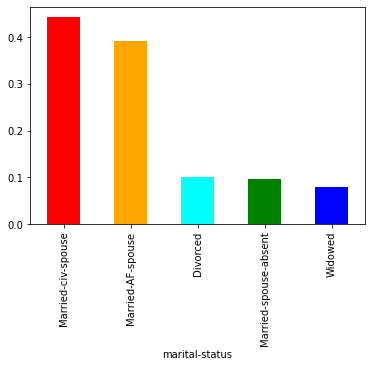

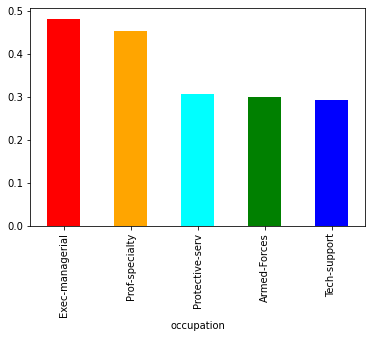

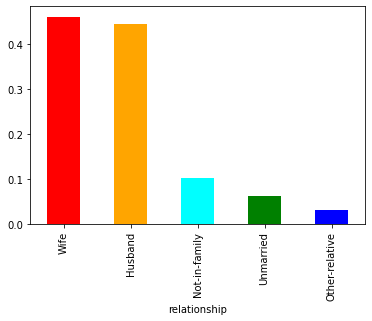

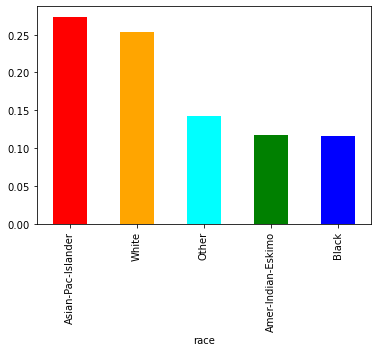

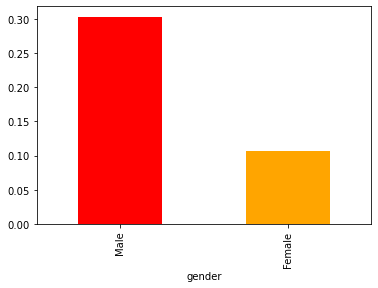

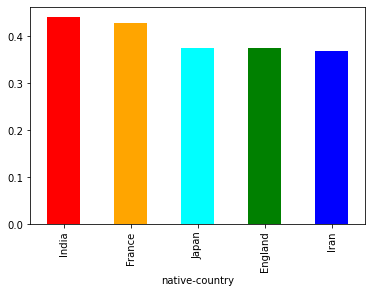

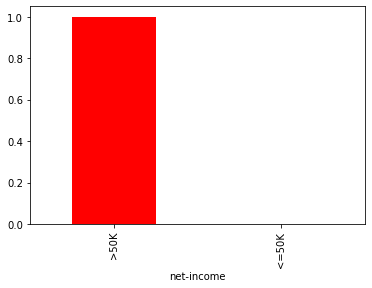

In [20]:
for col in cat_col:
    df.groupby(col)['income'].mean().sort_values(ascending = False).head().plot.bar(
    color = ["Red" , "Orange" , "Cyan" , "Green" , "Blue"])
    plt.show()

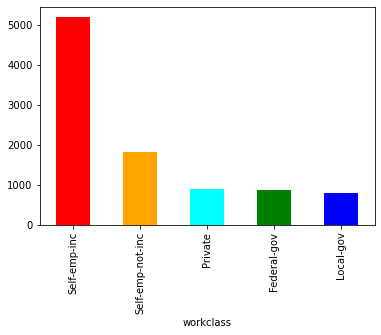

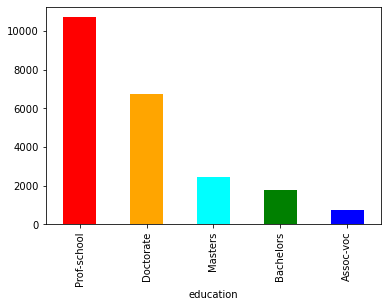

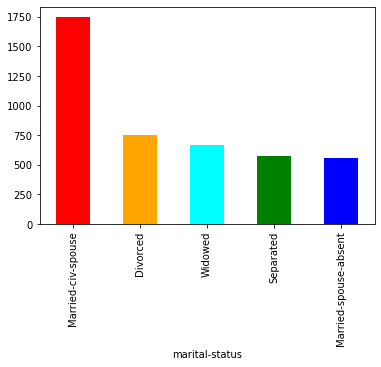

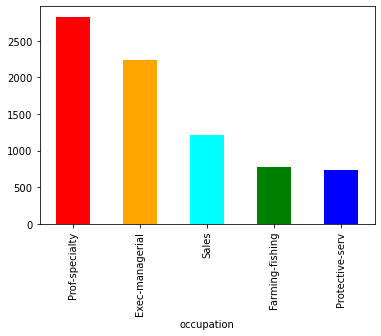

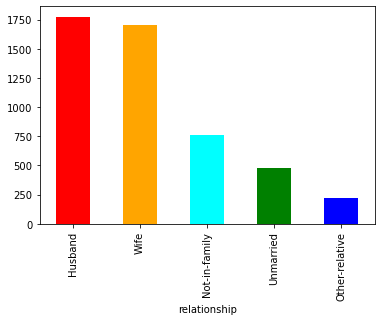

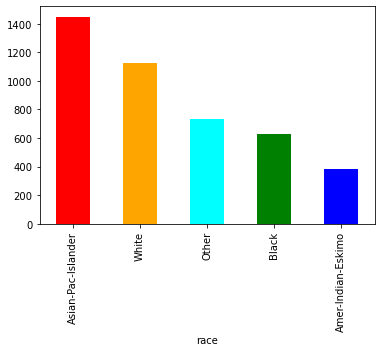

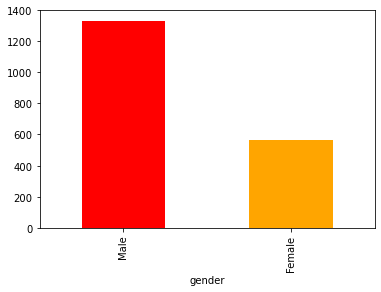

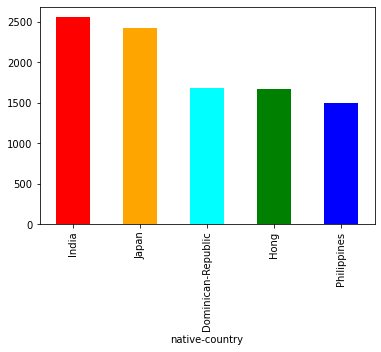

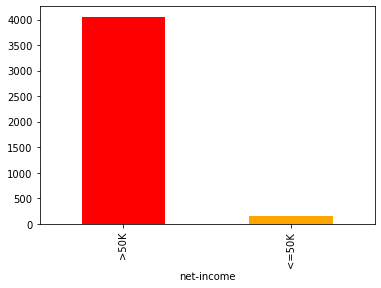

In [21]:
for col in cat_col:
    df.groupby(col)['capital-gain'].mean().sort_values(ascending = False).head().plot.bar(
    color = ["Red" , "Orange" , "Cyan" , "Green" , "Blue"])
    plt.show()

- Observation of the people having high chances of making income >50k is
1. If the person is 'Self Incorporated
2. Person having education of Pre-School or doctorate
3. Person married-civ-spouse
4. Person is Exec-managerail
5. Person has wife or Husband relationship with the other person means they are married
6. Person has race of Asian-Pacific-Islander
7. Person is Male
8. Person is from Indian or France

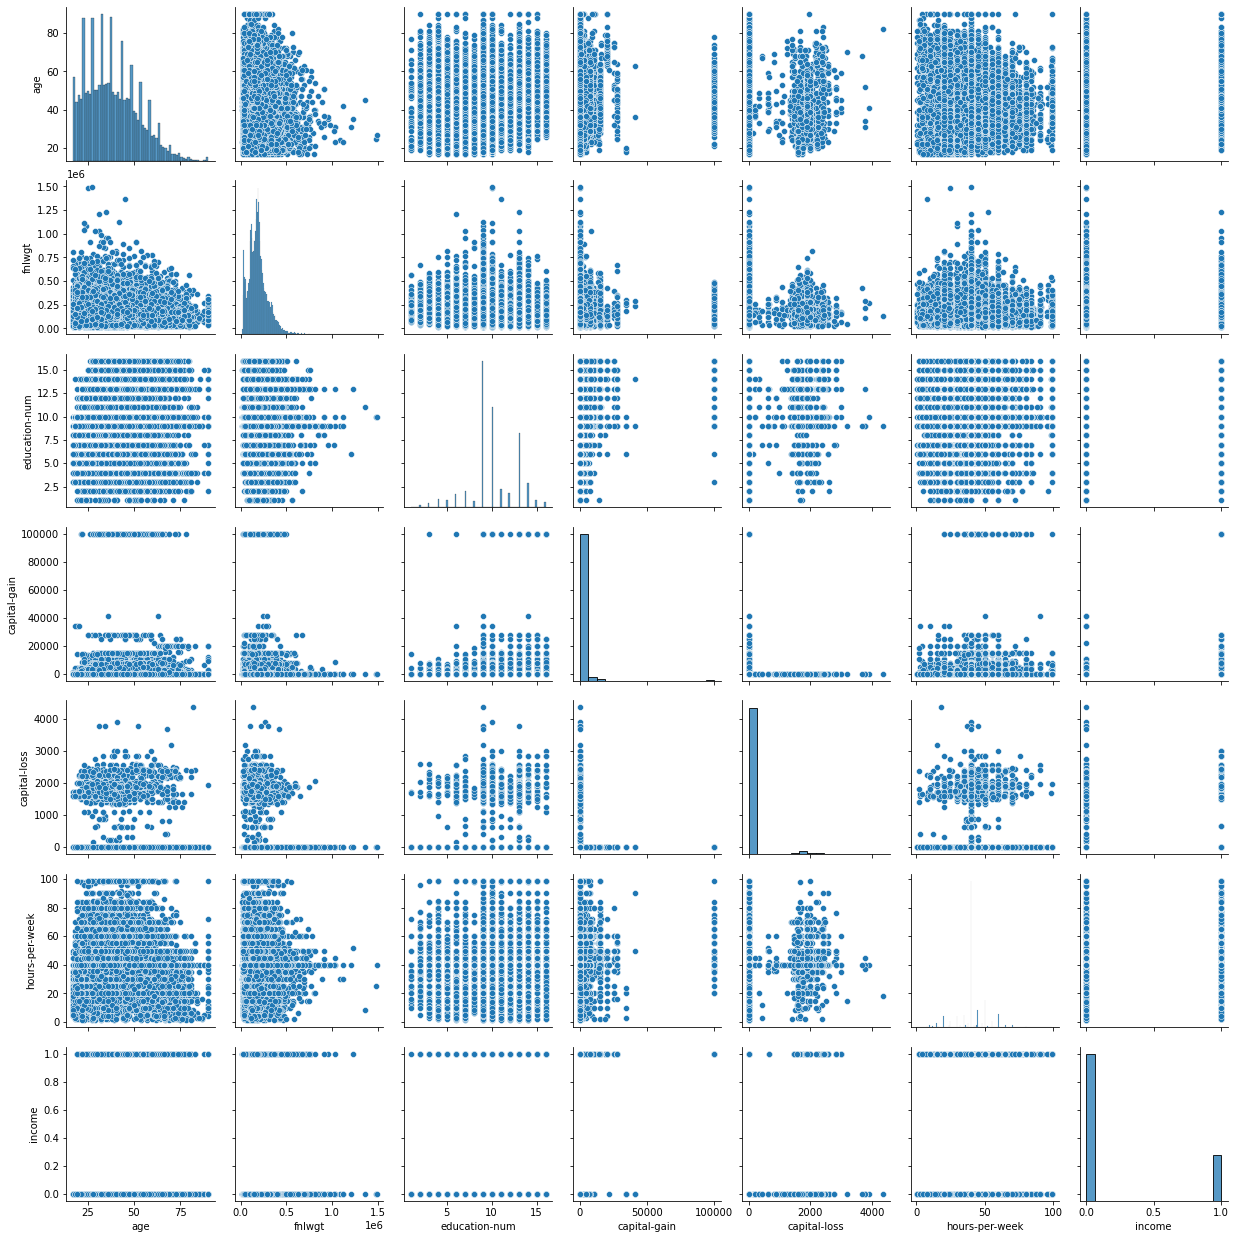

In [22]:
sns.pairplot(df.drop("ID" , axis = 1))

### Feature Engineering

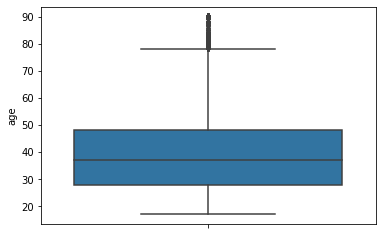

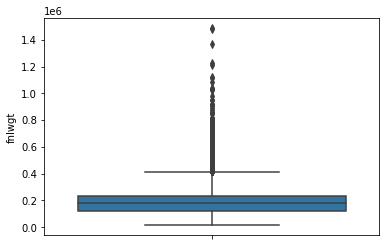

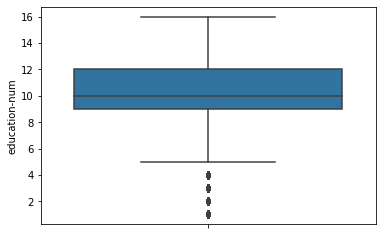

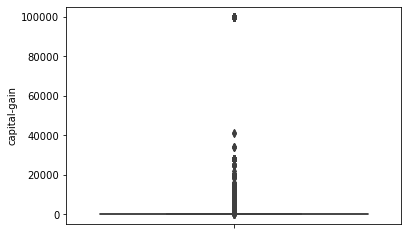

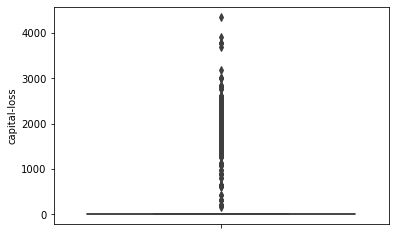

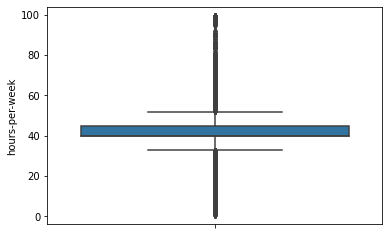

In [23]:
for col in num_col:
    if col != 'income':
        sns.boxplot(y = col  , data = df)
        plt.show()

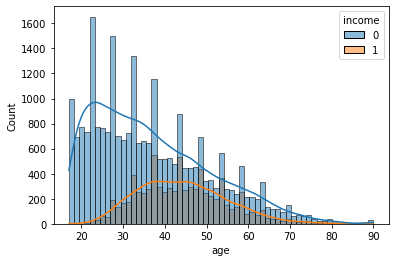

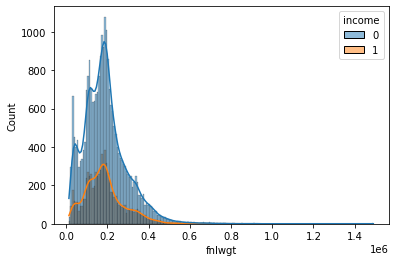

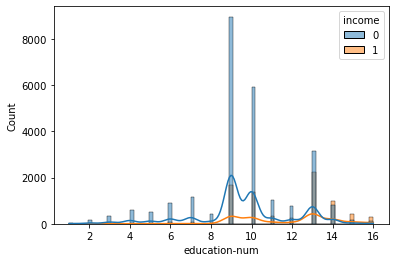

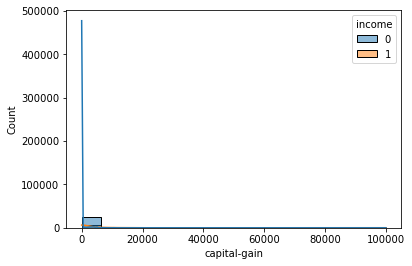

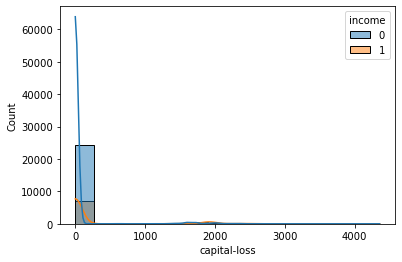

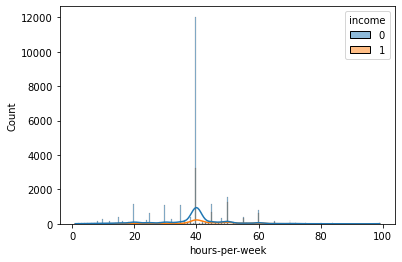

In [24]:
for col in num_col:
    if col != 'income':
        sns.histplot(x = col , data = df , kde = True , hue = "income")
        plt.show()

### Handling Outlier

In [25]:
# Here we can see that the age > 76 are considered as the outlier thus replacing the age 
# with random value between 20 to 75


df["age"] = np.where(df["age"] > 76,np.random.randint(20,75),df["age"])

In [26]:
# In fnlwgt the value > 370000 are considered as outlier thus handling them

df["fnlwgt"] = np.where(df["fnlwgt"] > 370000,np.random.randint(0,360000),df["fnlwgt"])

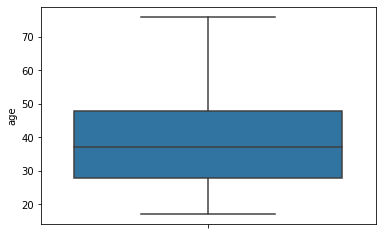

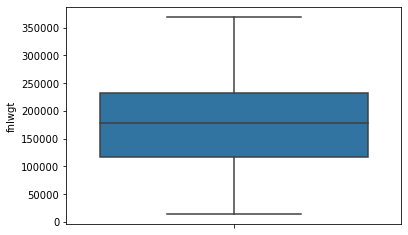

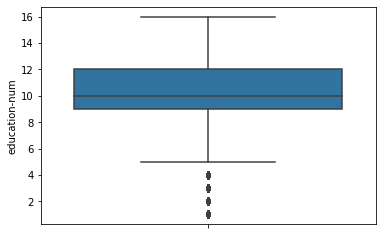

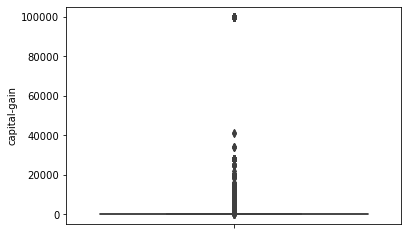

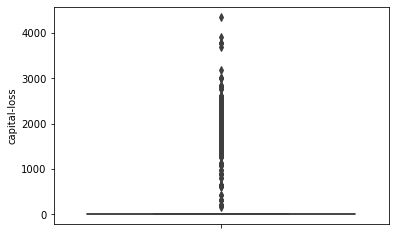

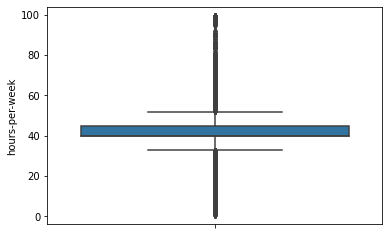

In [27]:
for col in num_col:
    if col != 'income':
        sns.boxplot(y = col  , data = df)
        plt.show()

In [28]:
X = df.drop('income', axis = 1)
y = df["income"]

In [29]:
X.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,Without-pay,35724,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [30]:
# As we have many value in the native-country thus replacing it with the dictionary
native = X["native-country"].value_counts().to_dict()

In [31]:
X["native-country"] = X["native-country"].map(native)

In [32]:
X.drop(["ID","education","net-income"] , axis = 1, inplace = True)

In [33]:
X.shape

(32724, 13)

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: income, dtype: int32

In [35]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,60,Self-emp-not-inc,235535,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,29379
1,28,Self-emp-not-inc,123983,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,80
2,71,Self-emp-not-inc,130436,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,29379
3,75,Without-pay,35724,9,Widowed,Handlers-cleaners,Not-in-family,White,Female,0,0,8,29379
4,50,Private,128143,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,29379


In [36]:
X = pd.get_dummies(columns = ["workclass","marital-status","occupation","relationship","race",
                "gender"] , drop_first=True , data = X )

In [37]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,60,235535,9,0,0,48,29379,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28,123983,10,0,0,63,80,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,71,130436,2,0,0,28,29379,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,75,35724,9,0,0,8,29379,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,50,128143,13,0,1887,50,29379,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [38]:
X.shape

(32724, 43)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0,stratify=y)

### Logistic Regression


In [41]:
log = LogisticRegression()

In [42]:
log.fit(x_train,y_train)

LogisticRegression()

In [43]:
log.score(x_test,y_test)

0.7998574047667549

### Random Forest Classifier

In [44]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
model.score(x_test,y_test)

0.855265838256264